In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 
plt.style.use('seaborn')

In [383]:
#Data loading
xtrain=pd.read_csv('Logistic_X_Train.csv')
ytrain=pd.read_csv('Logistic_Y_Train.csv')
xtest=pd.read_csv('Logistic_X_Test.csv')
class_0=xtrain.loc[(ytrain['label']==0)]
class_1=xtrain.loc[(ytrain['label']==1)]

In [384]:
#Training the model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
coeff=model.coef_
intercept=model.intercept_
print(coeff,intercept)

[[-3.92798396  3.10147056 -2.28040541]] [-4.27017148]


C:\Users\manmohan.pradhan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [385]:
#Testing the model
my_output=model.predict(xtest)
class_0_pred=xtest.loc[(my_output==0)]
class_1_pred=xtest.loc[(my_output==1)]
df=pd.DataFrame(my_output)
print('The classification of chemicals is:')
df


The classification of chemicals is:


,0
0,1
1,1
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,1


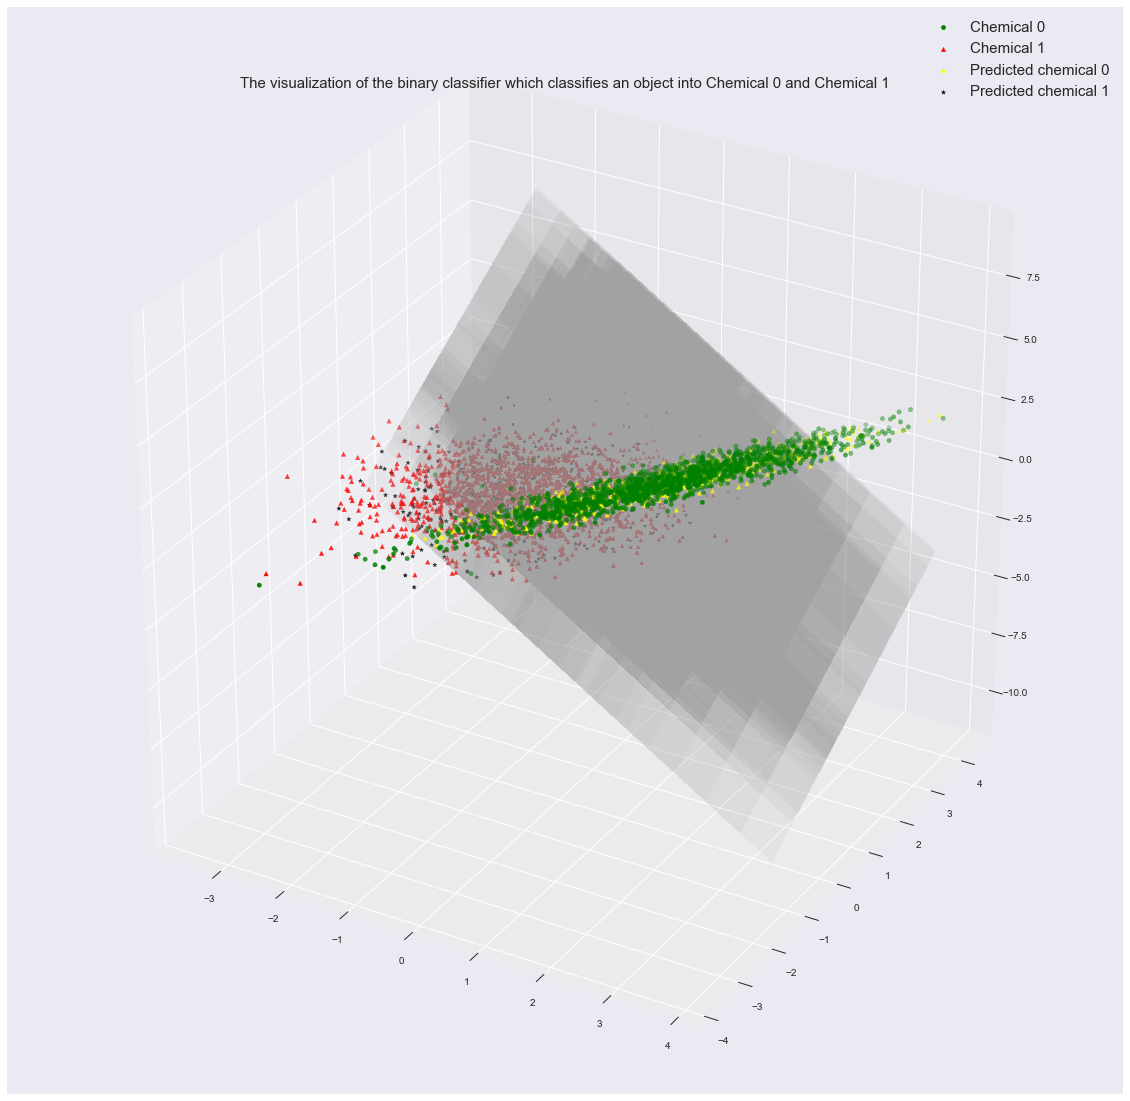

In [389]:
#Visualization of the model
fig = plt.figure(figsize=(20,20))
ax=plt.axes(projection='3d')
ax.scatter3D(class_0['f1'],class_0['f2'],class_0['f3'],label='Chemical 0',color='green')
ax.scatter3D(class_1['f1'],class_1['f2'],class_1['f3'],label='Chemical 1',marker='^',color='red')
x=xtest['f1']
y=xtest['f2']
xx, yy = np.meshgrid(x, y)
z=-((coeff[0][1]*yy+coeff[0][0]*xx+intercept)/coeff[0][2])
ax.plot_surface(xx,yy,z,alpha=0.02,color='w')
ax.scatter3D(class_0_pred['f1'],class_0_pred['f2'],class_0_pred['f3'],marker='^',label='Predicted chemical 0',color='yellow')
ax.scatter3D(class_1_pred['f1'],class_1_pred['f2'],class_1_pred['f3'],marker='*',label='Predicted chemical 1',color='black')
plt.title('The visualization of the binary classifier which classifies an object into Chemical 0 and Chemical 1',fontsize=15)
ax.legend(fontsize=15)


In [390]:
#Accuracy
print('The accuracy of the model is',model.score(xtrain,ytrain)) 

The accuracy of the model is 0.9953333333333333
